In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
loan=pd.read_csv(r"C:\My files\Study\Upgrad\C47\case_study\loan.csv")
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [2]:
loan.shape

(39717, 111)

In [3]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [2]:
df=pd.DataFrame(loan)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [13]:
df.isnull().sum() #total null values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# sum it up to check how many rows have all missing values
print('Number of empty Rows:')
print(df.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.

# sum it up to check how many columns have all missing values
print('Number of empty Columns:')
print(df.isnull().all(axis=0).sum())
# Observation: There are 54 columns have all missing values

Number of empty Rows:
0
Number of empty Columns:
54


In [3]:
# Data cleaning
# Lets Drop columns where all values are null. Below in sequence all columns have null values

df.drop(df.iloc[:, 53:105], inplace = True, axis = 1) 

# Drop additional columns we don't need these as these are mostly nulls.
columns_drop_list1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
df.drop(labels = columns_drop_list1, axis =1, inplace=True)
columns_drop_list2 = ["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
df.drop(labels = columns_drop_list2, axis =1, inplace=True)
columns_drop_list3 = ["member_id","url","emp_title","zip_code","tax_liens","application_type","policy_code","initial_list_status","installment","pymnt_plan"]
df.drop(labels = columns_drop_list3, axis =1, inplace=True)


In [7]:
df.shape

(39717, 40)

In [4]:
# Data cleaning
# Lets format employment length column to have only numbers. It may play important role in analysis further.

df['emp_length'].fillna('0',inplace=True)
df['emp_length']=df.emp_length.str.extract('(\d+)')
df.head(10)

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   
5  1075269       5000         5000           5000.0   36 months    7.90%   
6  1069639       7000         7000           7000.0   60 months   15.96%   
7  1072053       3000         3000           3000.0   36 months   18.64%   
8  1071795       5600         5600           5600.0   60 months   21.28%   
9  1071570       5375         5375           5350.0   60 months   12.69%   

  grade sub_grade emp_length home_ownership  ...  total_rec_prncp  \
0     B        B2         10           RENT  ...          5000.00   
1     C        C4          1           RENT  ...           456.46   
2     C        C5         10           RENT  ...          2400.00   
3     C        C1         10           RENT  ...         10000.00   
4     B        B5          1           RENT  ...          2475.94   
5     A        A4          3           RENT  ...          5000.00   
6     C        C5          8           RENT  ...          6985.61   
7     E        E1          9           RENT  ...          3000.00   
8     F        F2          4            OWN  ...           162.02   
9     B        B5          1           RENT  ...           673.48   

  total_rec_int total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16               0.00       0.00                    0.00   
1        435.17               0.00     117.08                    1.11   
2        605.67               0.00       0.00                    0.00   
3       2214.92              16.97       0.00                    0.00   
4       1037.39               0.00       0.00                    0.00   
5        632.21               0.00       0.00                    0.00   
6       3125.23               0.00       0.00                    0.00   
7        939.14               0.00       0.00                    0.00   
8        294.94               0.00     189.06                    2.09   
9        533.42               0.00     269.29                    2.52   

  last_pymnt_d last_pymnt_amnt  last_credit_pull_d  \
0       Jan-15          171.62              May-16   
1       Apr-13          119.66              Sep-13   
2       Jun-14          649.91              May-16   
3       Jan-15          357.48              Apr-16   
4       May-16           67.79              May-16   
5       Jan-15          161.03              Jan-16   
6       May-16         1313.76              May-16   
7       Jan-15          111.34              Dec-14   
8       Apr-12          152.39              Aug-12   
9       Nov-12          121.45              Mar-13   

   collections_12_mths_ex_med pub_rec_bankruptcies  
0                         0.0                  0.0  
1                         0.0                  0.0  
2                         0.0                  0.0  
3                         0.0                  0.0  
4                         0.0                  0.0  
5                         0.0                  0.0  
6                         0.0                  0.0  
7                         0.0                  0.0  
8                         0.0                  0.0  
9                         0.0                  0.0  

[10 rows x 40 columns]

In [9]:
#df['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

In [5]:
# Data cleaning
# pub_rec_bankruptcies can be cleaned for further analysis.
print("Before cleaning:")
print(df.pub_rec_bankruptcies.isnull().sum())
print("After cleaning:")
df.pub_rec_bankruptcies.fillna('not known',inplace=True)
print(df.pub_rec_bankruptcies.isnull().sum())

Before cleaning:
697
After cleaning:
0


In [39]:
#print(round(df.pub_rec_bankruptcies.isnull().sum()*100/len(df),3))

1.755


In [42]:
#df['pub_rec_bankruptcies'].value_counts()*100/len(df)

0.0    94.012639
1.0     4.214820
2.0     0.017625
Name: pub_rec_bankruptcies, dtype: float64

In [6]:
# Data cleaning
# Lets remove % symbol from intrest rate column so that it can be used in calculations
df['int_rate'] = df['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [7]:
# convert amount columns into numeric data to find some correlation among important ones.
import warnings
warnings.filterwarnings('ignore')
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','annual_inc','dti','emp_length','total_pymnt']
df[cols1] = df[cols1].apply(pd.to_numeric)


In [14]:
# Lets take a look on important variable loan status in total loans issued

(df.loan_status.value_counts()*100)/len(loan)

# Observations
# 82.961956 percent loans were fully paid.
# Close to 14% loans were charged off
# 2 % have  EMI running status

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [15]:
# Lets take a look on important variable purpose of loan in total loans issued

(loan.purpose.value_counts()*100)/len(loan)

# Observations
# Most of the loans taken for debt consolidation(46.93~47%) and Credit card bill payment
# Other is also one of the main area where loans were taken.

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

Derive Columns For Analysis -

In [8]:
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

df.head(5)

# Observations
# Two new columns month and year were derived from issue date

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000           4975.0   36 months     10.65   
1  1077430       2500         2500           2500.0   60 months     15.27   
2  1077175       2400         2400           2400.0   36 months     15.96   
3  1076863      10000        10000          10000.0   36 months     13.49   
4  1075358       3000         3000           3000.0   60 months     12.69   

  grade sub_grade  emp_length home_ownership  ...  total_rec_late_fee  \
0     B        B2          10           RENT  ...                0.00   
1     C        C4           1           RENT  ...                0.00   
2     C        C5          10           RENT  ...                0.00   
3     C        C1          10           RENT  ...               16.97   
4     B        B5           1           RENT  ...                0.00   

  recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt  \
0       0.00                    0.00       Jan-15          171.62   
1     117.08                    1.11       Apr-13          119.66   
2       0.00                    0.00       Jun-14          649.91   
3       0.00                    0.00       Jan-15          357.48   
4       0.00                    0.00       May-16           67.79   

  last_credit_pull_d collections_12_mths_ex_med  pub_rec_bankruptcies  year  \
0             May-16                        0.0                   0.0  2011   
1             Sep-13                        0.0                   0.0  2011   
2             May-16                        0.0                   0.0  2011   
3             Apr-16                        0.0                   0.0  2011   
4             May-16                        0.0                   0.0  2011   

  month  
0    12  
1    12  
2    12  
3    12  
4    12  

[5 rows x 42 columns]

# Univariate Analysis 

In [17]:
# Basic statistics with .describe() - Quantitative Variables
df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [19]:
#df.loan_amnt.quantile(0.75)

15000.0

<AxesSubplot:xlabel='loan_amnt'>

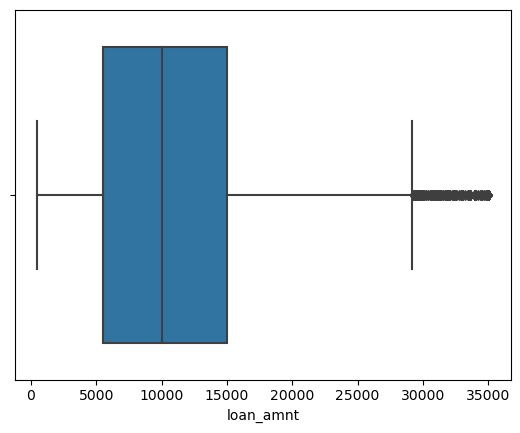

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df.loan_amnt)

In [21]:
# Basic statistics with .describe() -Quantitative Variables
df.total_pymnt.describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

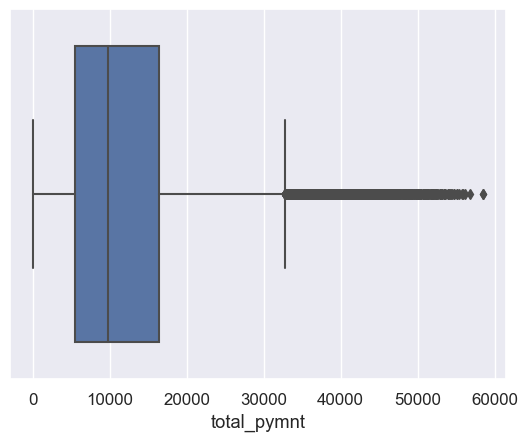

In [28]:
sns.boxplot(df.total_pymnt)

In [19]:
# Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(df['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

df= df[df["annual_inc"] < df["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(df["annual_inc"].describe())

# Now below data looks much better. Lets plot later and find some conclusion

Before Removal of Outliers :

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64


In [26]:
#df.annual_inc

0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 39319, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

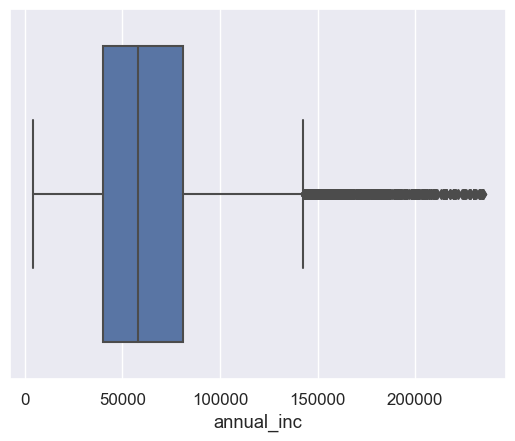

In [29]:
sns.boxplot(df.annual_inc)

In [21]:
# Basic statistics with .describe() -Quantitative Variables

df['int_rate'].describe()

# Average intrest rate is 12 %
# after 75% percentile interest rate increased upto  25% from 15%.

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

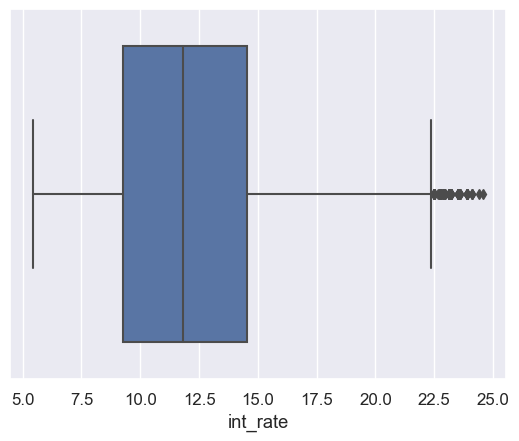

In [30]:
sns.boxplot(df.int_rate)

Correlation Matrix - Quantitative Variables

In [10]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.
#df = df.dropna('any')
import matplotlib.pyplot as plt
df_correlation = df[cols1].corr()
df_correlation
sns.set(font_scale=1.1)
sns.clustermap(df_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

# Observation is that Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
# That means when annual income is low DTI is high & vice versa.
# positive correlation between annual income and employment years.
# That means income increases with work experience ;

NameError: name 'sns' is not defined

In [17]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
df['loan_amnt_cats'] = pd.cut(df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df['annual_inc_cats'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df['int_rate_cats'] = pd.cut(df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
df['dti_cats'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

Univariate Analysis -

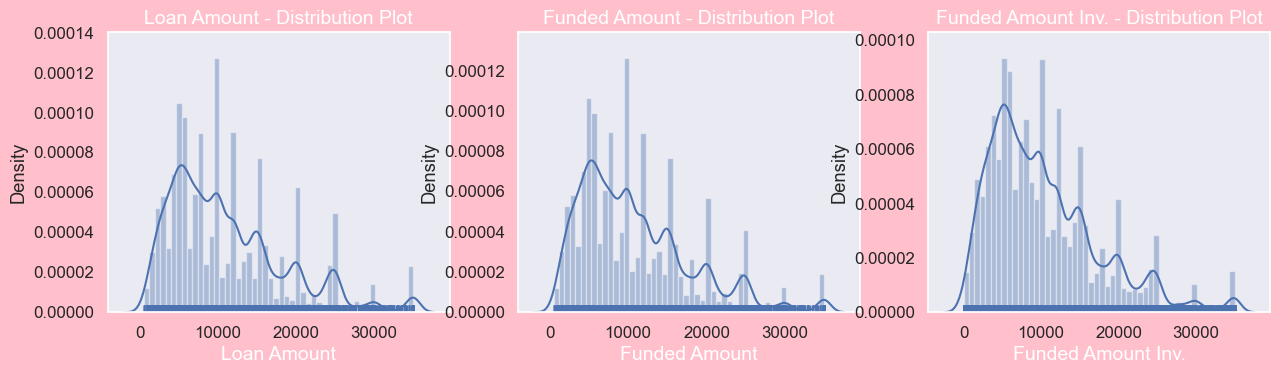

In [43]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='pink')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(df['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 3
plt.subplot(2, 3, 3)
ax = sns.distplot(df['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

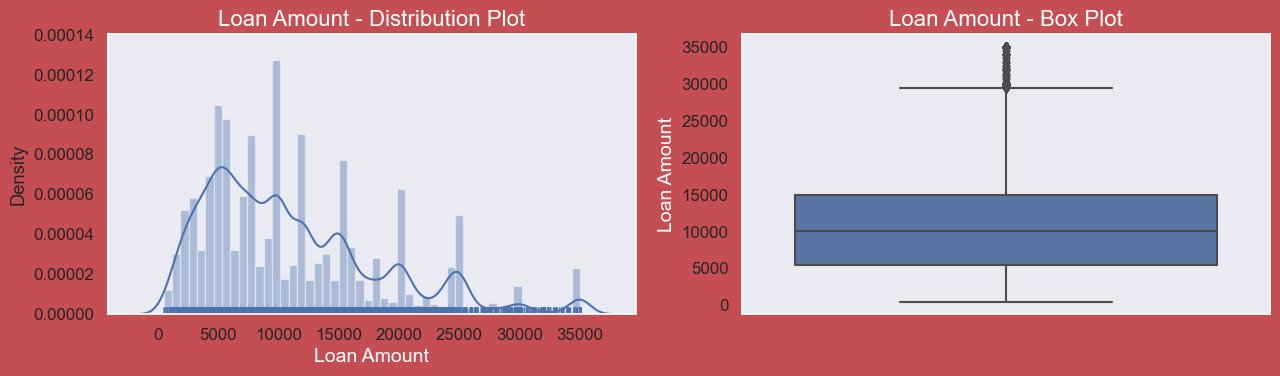

In [45]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='r')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

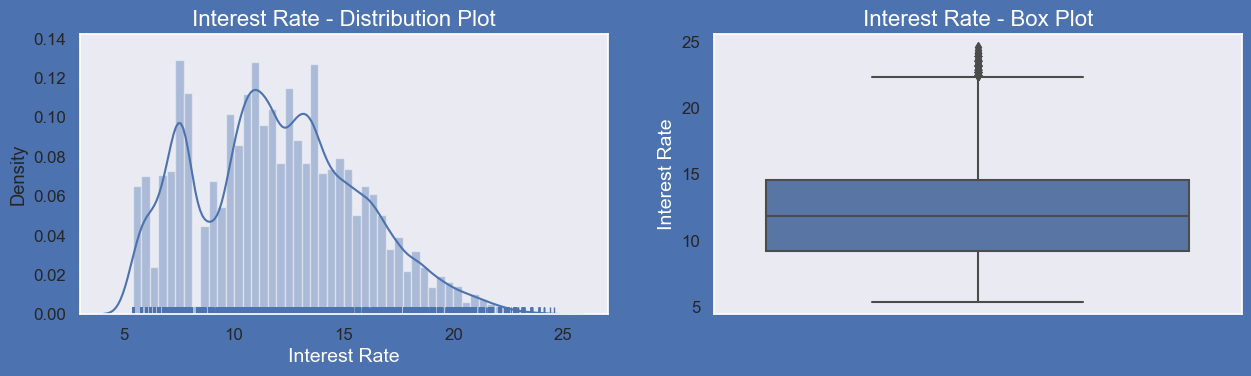

In [46]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()
# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

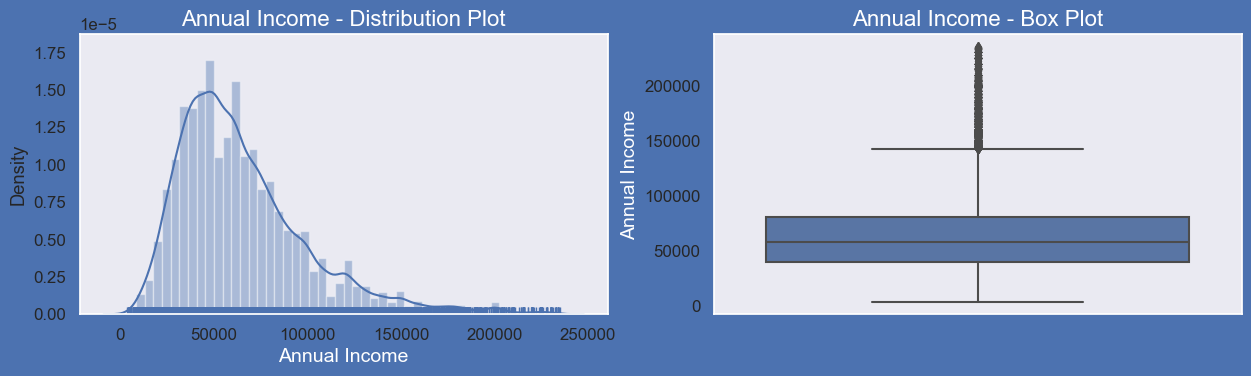

In [47]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=df['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()
# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000


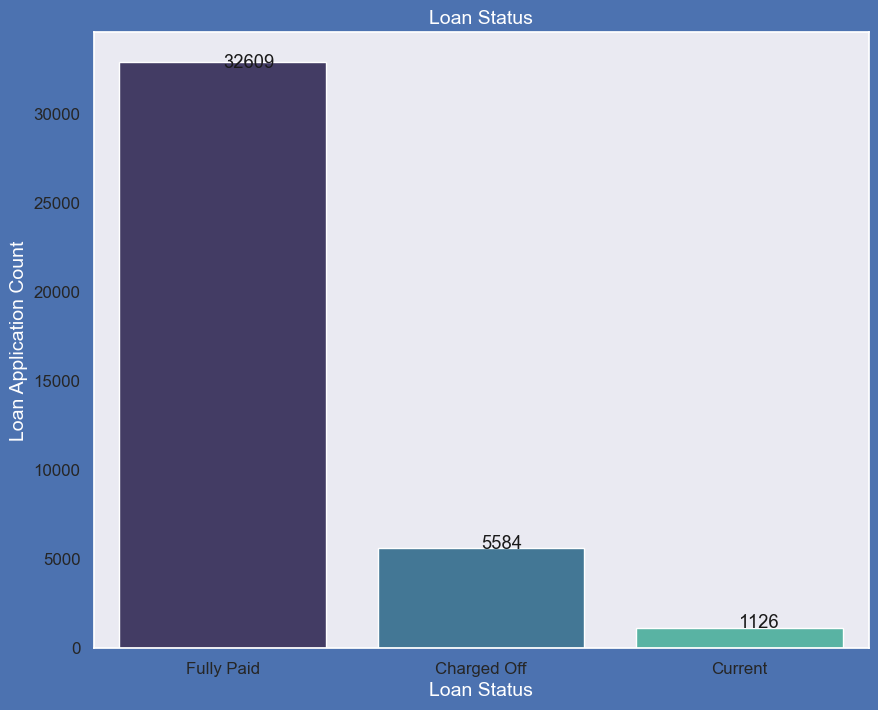

In [48]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=df,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=df['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.


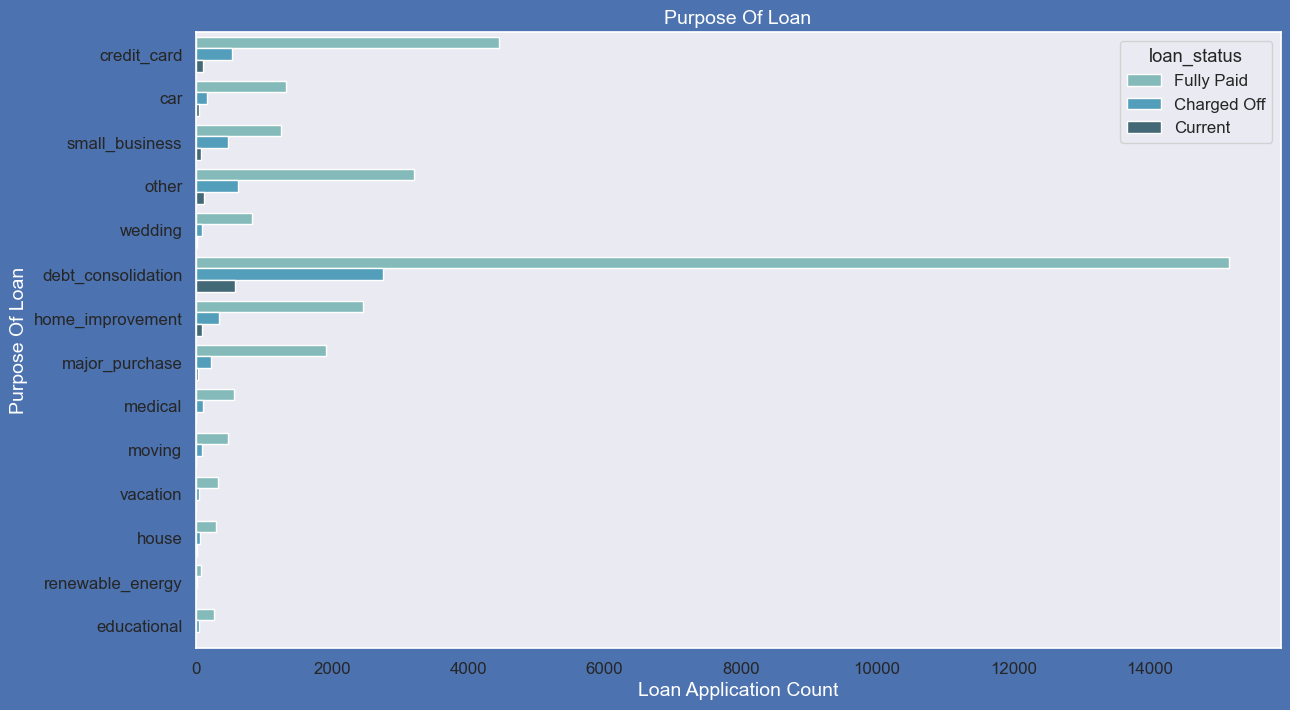

In [54]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

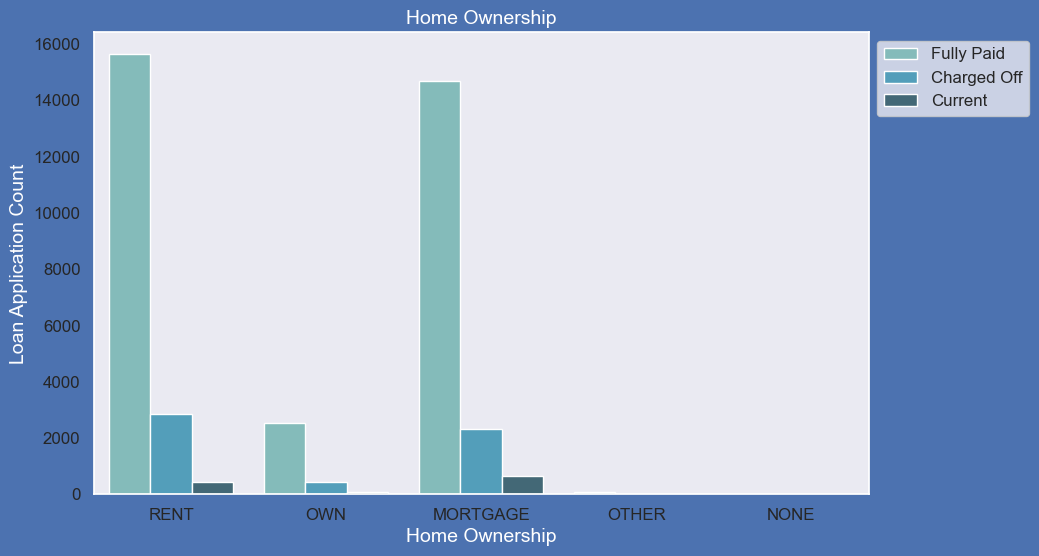

In [55]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.


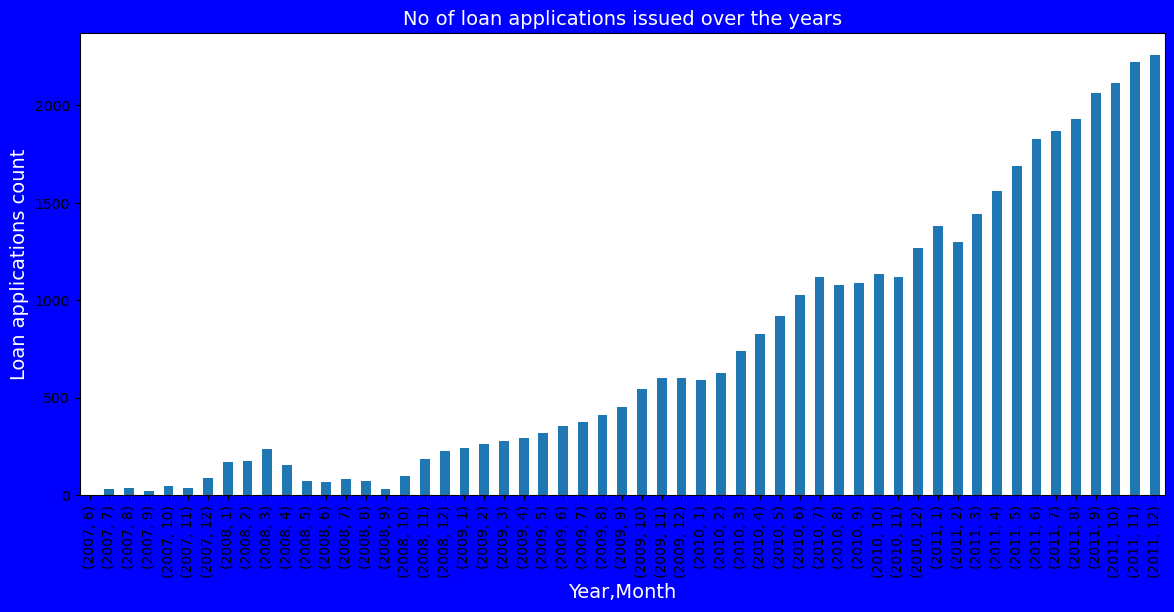

In [12]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6),facecolor='b')
df.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()


# Observation is that count of loan application is increasing every passing year.
# so increase in number of loan applications are adding more to number of charged off applications.
# number of loans issued in 2008( May-October) got dipped, may be due to Recession.

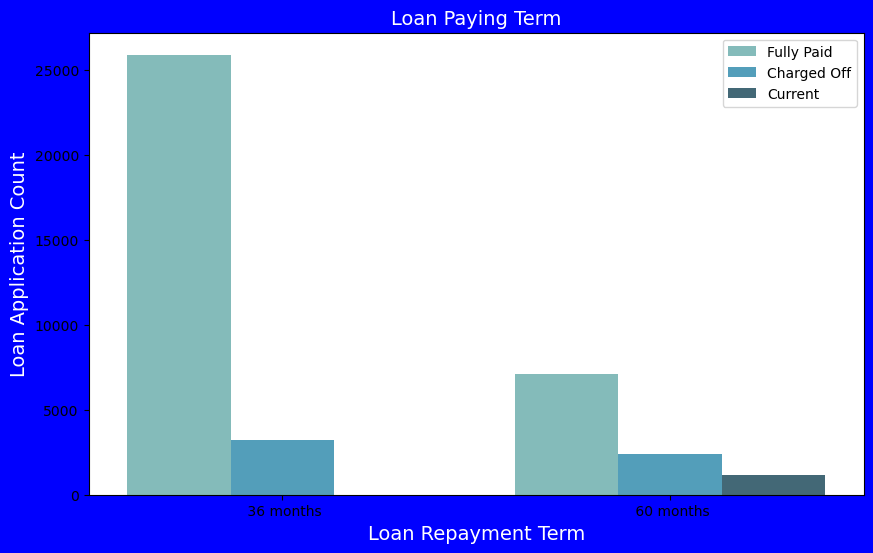

In [13]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=df,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 36 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 60 months.

Bivariate Analysis : Part 1

#### Bivariate Analysis : # In this part of analysis, lets try to analyze the loan status against some important columns which might have played # important role in charged off of loans. Lets try to find proportion of charged offs in some categories. # To calculate the proportion of charged off loans, will do these below steps: # Group loans by different variables and loan status, get the count,use .unstack() to return a DataFrame. # Since we’re going to use this for further analysis, it will be helpful to use .reset_index() to clean up the index. # Assign the new DataFrame to a variable. # Create a simple derived column that sums charged off,current and fully paid loans for each category. # Divide the number of charged off loans by the total number of loans to get the proportion of charged off loans. # Store this as another derived column. # Finally, output the whole table, sorted by proportion of charged off in each category issued loans.

In [19]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = df.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status annual_inc_cats  Charged Off  Current  Fully Paid  Total  \
0                   0-20000          237        9         943   1189   
1               20000-40000         1514      170        7004   8688   
2               40000-60000         1729      345        9534  11608   
3               60000-80000         1024      240        6597   7861   
4                   80000 +         1122      376        8859  10357   

loan_status  Chargedoff_Proportion  
0                         0.199327  
1                         0.174263  
2                         0.148949  
3                         0.130263  
4                         0.108333

In [16]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'year', 'month'],
      dtype='object')

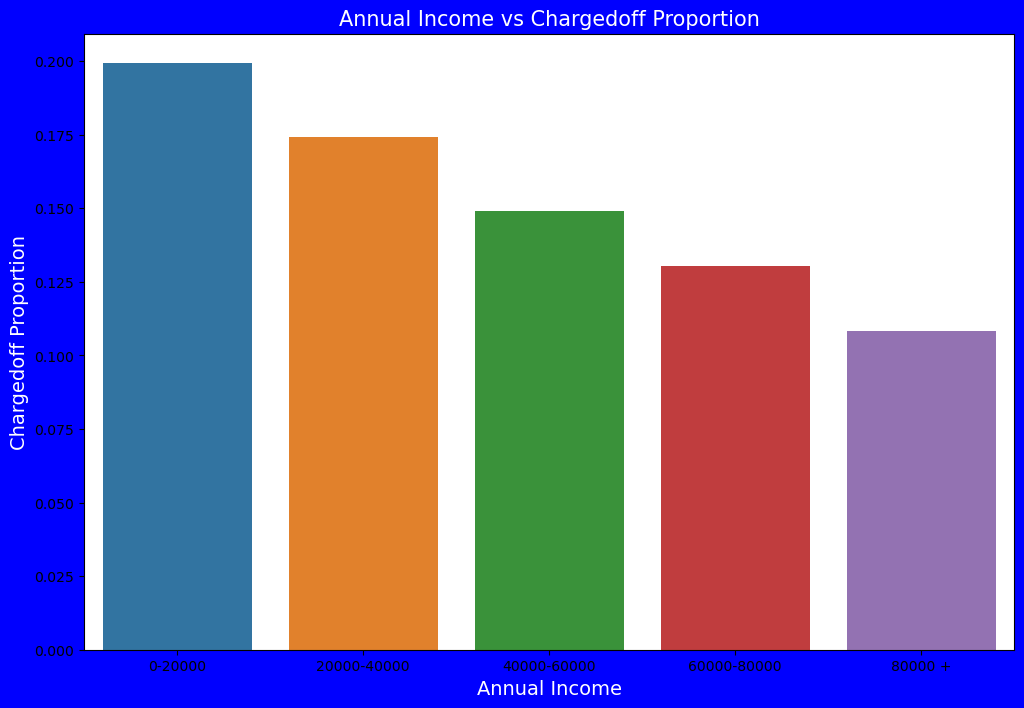

In [20]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

In [21]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status             purpose  Charged Off  Current  Fully Paid    Total  \
11               small_business        475.0     74.0      1279.0   1828.0   
10             renewable_energy         19.0      1.0        83.0    103.0   
3                   educational         56.0      0.0       269.0    325.0   
9                         other        633.0    128.0      3232.0   3993.0   
8                        moving         92.0      7.0       484.0    583.0   
5                         house         59.0     14.0       308.0    381.0   
7                       medical        106.0     12.0       575.0    693.0   
2            debt_consolidation       2767.0    586.0     15288.0  18641.0   
12                     vacation         53.0      6.0       322.0    381.0   
4              home_improvement        347.0    101.0      2528.0   2976.0   
1                   credit_card        542.0    103.0      4485.0   5130.0   
0                           car        160.0     50.0      1339.0   1549.0   
6                major_purchase        222.0     37.0      1928.0   2187.0   
13                      wedding         96.0     21.0       830.0    947.0   

loan_status  Chargedoff_Proportion  
11                        0.259847  
10                        0.184466  
3                         0.172308  
9                         0.158527  
8                         0.157804  
5                         0.154856  
7                         0.152958  
2                         0.148436  
12                        0.139108  
4                         0.116599  
1                         0.105653  
0                         0.103292  
6                         0.101509  
13                        0.101373

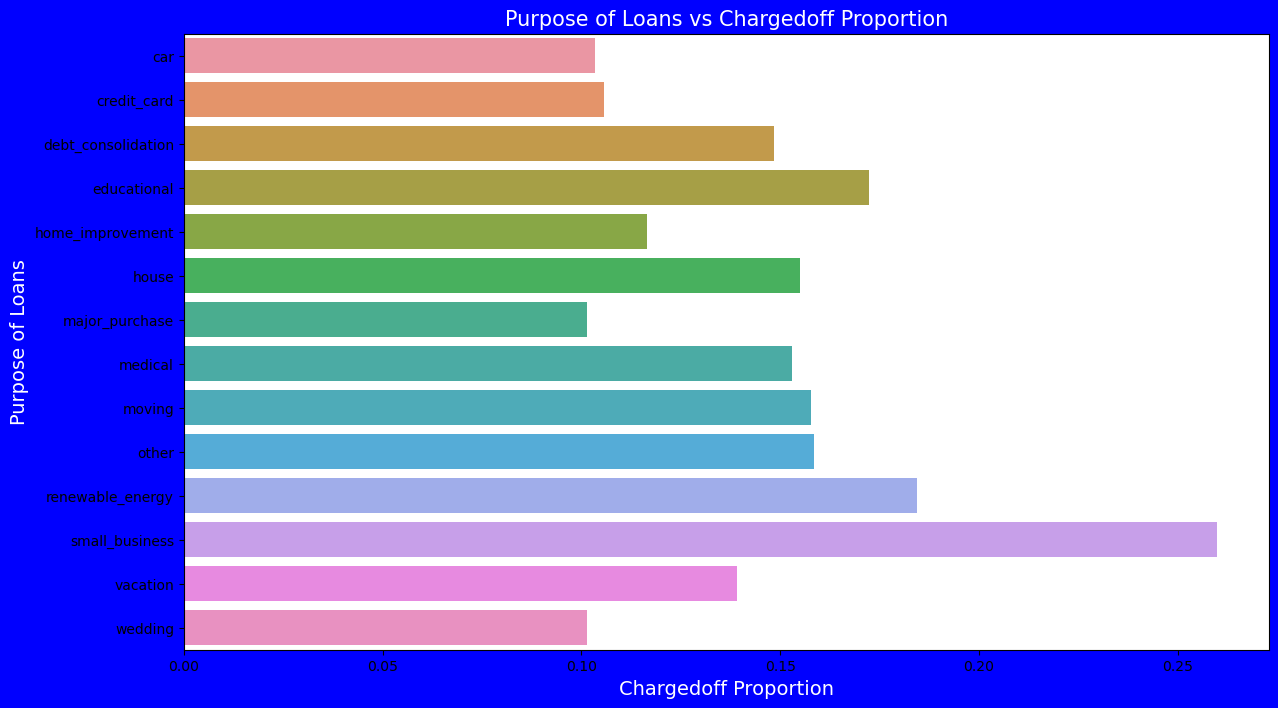

In [22]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

In [24]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status grade  Charged Off  Current  Fully Paid  Total  \
6               G          101       17         198    316   
5               F          319       73         657   1049   
4               E          715      179        1948   2842   
3               D         1118      222        3967   5307   
2               C         1347      264        6487   8098   
1               B         1425      345       10250  12020   
0               A          602       40        9443  10085   

loan_status  Chargedoff_Proportion  
6                         0.319620  
5                         0.304099  
4                         0.251583  
3                         0.210665  
2                         0.166337  
1                         0.118552  
0                         0.059693

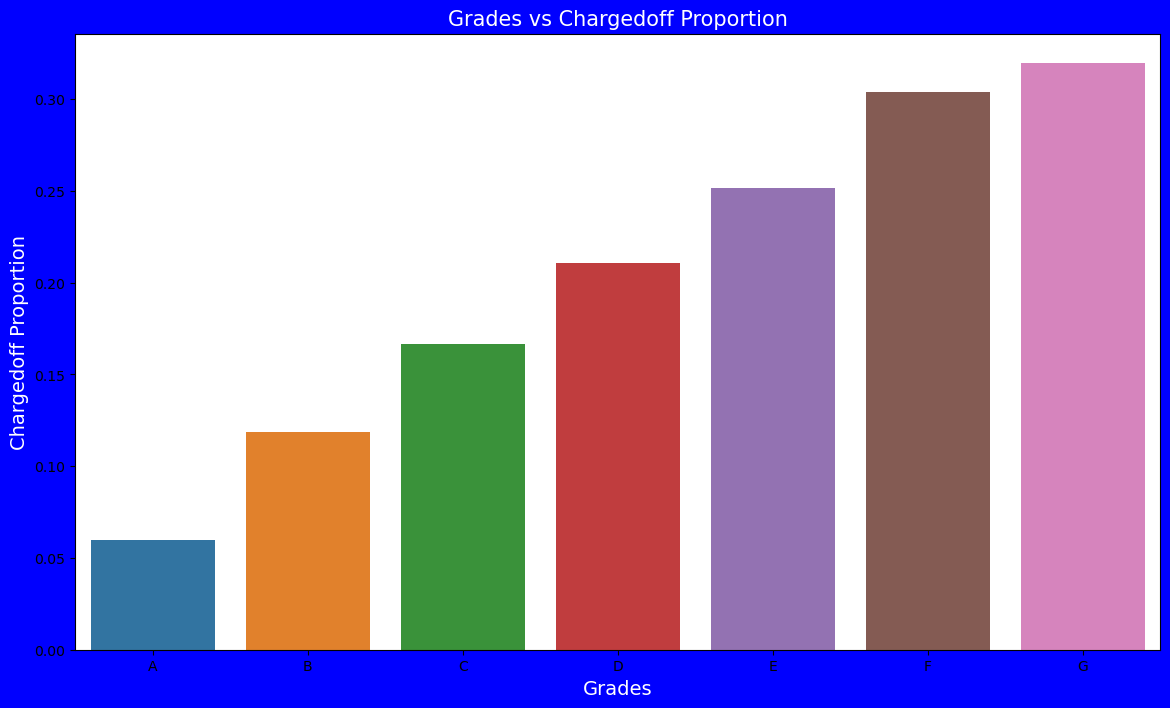

In [25]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

In [26]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan = df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

loan_status sub_grade  Charged Off  Current  Fully Paid   Total  \
29                 F5         54.0      5.0        59.0   118.0   
32                 G3         19.0      3.0        26.0    48.0   
31                 G2         28.0      1.0        49.0    78.0   
34                 G5         10.0      1.0        19.0    30.0   
28                 F4         53.0     17.0        98.0   168.0   
30                 G1         31.0     10.0        63.0   104.0   
26                 F2         70.0     16.0       163.0   249.0   
23                 E4        126.0     30.0       298.0   454.0   
25                 F1         91.0     24.0       214.0   329.0   
27                 F3         51.0     11.0       123.0   185.0   
24                 E5        109.0     29.0       278.0   416.0   
20                 E1        198.0     41.0       524.0   763.0   
21                 E2        163.0     42.0       451.0   656.0   
19                 D5        209.0     40.0       625.0   874.0   
33                 G4         13.0      2.0        41.0    56.0   
18                 D4        215.0     63.0       703.0   981.0   
17                 D3        256.0     57.0       860.0  1173.0   
22                 E3        119.0     37.0       397.0   553.0   
16                 D2        271.0     62.0      1015.0  1348.0   
15                 D1        167.0      0.0       764.0   931.0   
12                 C3        270.0     41.0      1218.0  1529.0   
14                 C5        208.0     32.0       946.0  1186.0   
13                 C4        212.0     30.0       994.0  1236.0   
11                 C2        321.0     80.0      1610.0  2011.0   
10                 C1        336.0     81.0      1719.0  2136.0   
9                  B5        356.0     89.0      2259.0  2704.0   
8                  B4        329.0     75.0      2108.0  2512.0   
7                  B3        341.0     92.0      2484.0  2917.0   
6                  B2        228.0     56.0      1773.0  2057.0   
5                  B1        171.0     33.0      1626.0  1830.0   
4                  A5        217.0     27.0      2498.0  2742.0   
3                  A4        178.0     13.0      2695.0  2886.0   
2                  A3        103.0      0.0      1707.0  1810.0   
1                  A2         74.0      0.0      1434.0  1508.0   
0                  A1         30.0      0.0      1109.0  1139.0   

loan_status  Chargedoff_Proportion  
29                        0.457627  
32                        0.395833  
31                        0.358974  
34                        0.333333  
28                        0.315476  
30                        0.298077  
26                        0.281124  
23                        0.277533  
25                        0.276596  
27                        0.275676  
24                        0.262019  
20                        0.259502  
21                        0.248476  
19                        0.239130  
33                        0.232143  
18                        0.219164  
17                        0.218244  
22                        0.215190  
16                        0.201039  
15                        0.179377  
12                        0.176586  
14                        0.175379  
13                        0.171521  
11                        0.159622  
10                        0.157303  
9                         0.131657  
8                         0.130971  
7                         0.116901  
6                         0.110841  
5                         0.093443  
4                         0.079139  
3                         0.061677  
2                         0.056906  
1                         0.049072  
0                         0.026339

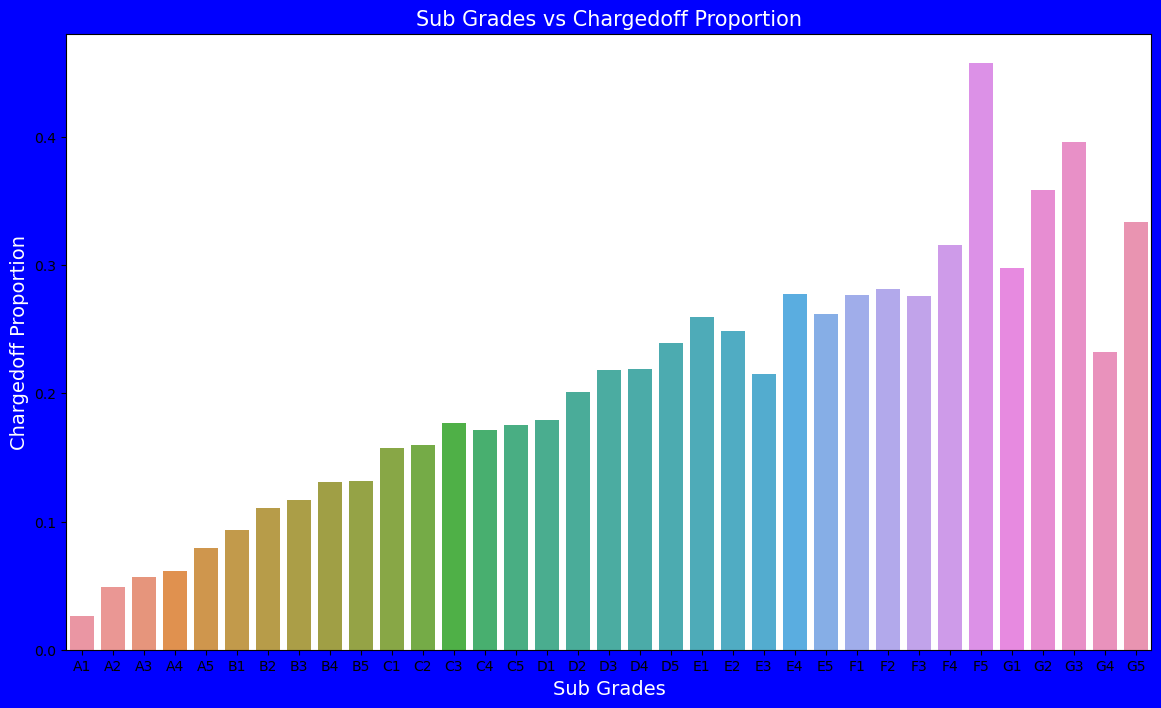

In [27]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [29]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = df.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

loan_status int_rate_cats  Charged Off  Current  Fully Paid  Total  \
3                    16 +         1266      359        3372   4997   
2                 12.5-16         2003      332        9470  11805   
1                   10-13         1232      270        8148   9650   
0                    0-10          830       77       11486  12393   

loan_status  Chargedoff_Proportion  
3                         0.253352  
2                         0.169674  
1                         0.127668  
0                         0.066973

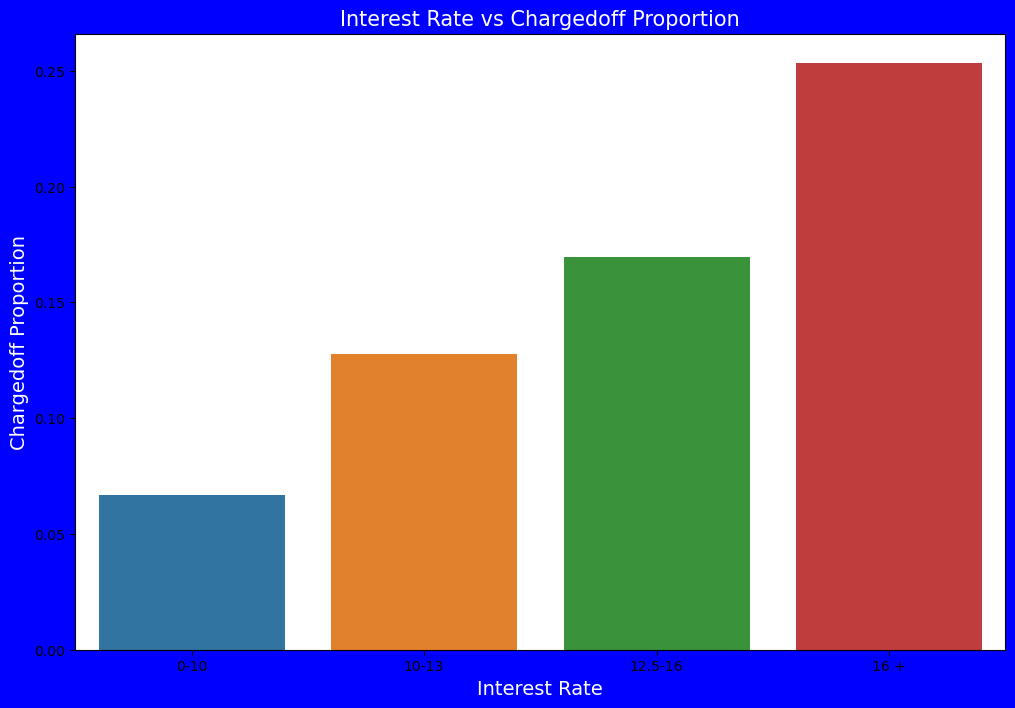

In [30]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.


In [31]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status  emp_length  Charged Off  Current  Fully Paid  Total  \
0                     0          228       42         805   1075   
10                   10         1331      391        7157   8879   
7                     7          263       62        1448   1773   
1                     1         1095      146        6582   7823   
5                     5          458       88        2736   3282   
6                     6          307       61        1861   2229   
8                     8          203       44        1232   1479   
3                     3          555       83        3457   4095   
4                     4          462       94        2880   3436   
2                     2          567       97        3724   4388   
9                     9          158       32        1068   1258   

loan_status  Chargedoff_Proportion  
0                         0.212093  
10                        0.149904  
7                         0.148336  
1                         0.139972  
5                         0.139549  
6                         0.137730  
8                         0.137255  
3                         0.135531  
4                         0.134459  
2                         0.129216  
9                         0.125596

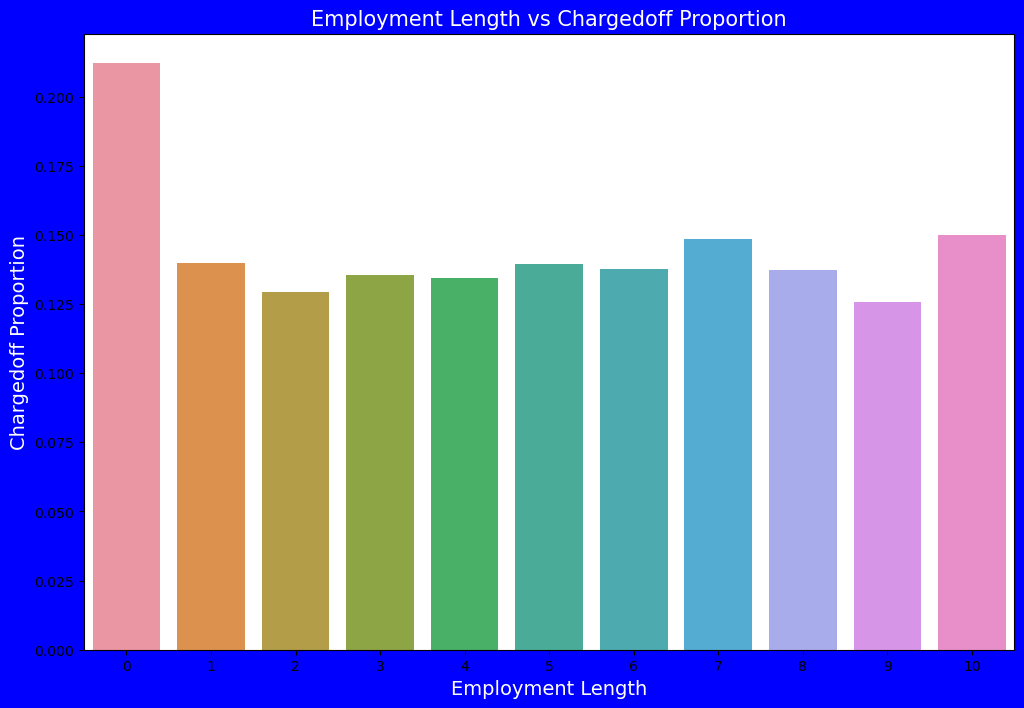

In [32]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.


In [33]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

loan_status addr_state  Charged Off  Current  Fully Paid   Total  \
28                  NE          3.0      0.0         2.0     5.0   
32                  NV        108.0     18.0       371.0   497.0   
0                   AK         15.0      2.0        63.0    80.0   
40                  SD         12.0      2.0        50.0    64.0   
9                   FL        504.0     85.0      2277.0  2866.0   
13                  ID          1.0      0.0         5.0     6.0   
24                  MO        114.0     16.0       556.0   686.0   
11                  HI         28.0      8.0       138.0   174.0   
31                  NM         30.0      6.0       153.0   189.0   
4                   CA       1125.0    150.0      5824.0  7099.0   
36                  OR         71.0     16.0       364.0   451.0   
43                  UT         40.0      6.0       212.0   258.0   
20                  MD        162.0     26.0       861.0  1049.0   
10                  GA        215.0     39.0      1144.0  1398.0   
46                  WA        127.0     22.0       691.0   840.0   
30                  NJ        278.0     60.0      1512.0  1850.0   
29                  NH         25.0      5.0       141.0   171.0   
27                  NC        114.0     38.0       636.0   788.0   
22                  MI        103.0     16.0       601.0   720.0   
3                   AZ        123.0     30.0       726.0   879.0   
39                  SC         66.0     13.0       393.0   472.0   
17                  KY         45.0     14.0       266.0   325.0   
47                  WI         63.0     20.0       377.0   460.0   
35                  OK         40.0     12.0       247.0   299.0   
23                  MN         81.0     10.0       524.0   615.0   
33                  NY        495.0    114.0      3203.0  3812.0   
26                  MT         11.0      2.0        72.0    85.0   
14                  IL        197.0     47.0      1281.0  1525.0   
34                  OH        155.0     45.0      1023.0  1223.0   
38                  RI         25.0      4.0       169.0   198.0   
44                  VA        177.0     38.0      1192.0  1407.0   
6                   CT         94.0     25.0       632.0   751.0   
5                   CO         98.0     26.0       668.0   792.0   
18                  LA         53.0      9.0       374.0   436.0   
1                   AL         54.0     17.0       381.0   452.0   
19                  MA        159.0     43.0      1138.0  1340.0   
37                  PA        180.0     49.0      1288.0  1517.0   
48                  WV         21.0      5.0       151.0   177.0   
41                  TN          2.0      0.0        15.0    17.0   
42                  TX        316.0     68.0      2343.0  2727.0   
16                  KS         31.0     16.0       224.0   271.0   
45                  VT          6.0      1.0        47.0    54.0   
2                   AR         27.0     10.0       208.0   245.0   
25                  MS          2.0      0.0        17.0    19.0   
8                   DE         12.0      1.0       101.0   114.0   
7                   DC         15.0      3.0       196.0   214.0   
49                  WY          4.0      3.0        76.0    83.0   
21                  ME          0.0      0.0         3.0     3.0   
15                  IN          0.0      0.0         9.0     9.0   
12                  IA          0.0      0.0         5.0     5.0   

loan_status  Chargedoff_Proportion  
28                        0.600000  
32                        0.217304  
0                         0.187500  
40                        0.187500  
9                         0.175855  
13                        0.166667  
24                        0.166181  
11                        0.160920  
31                        0.158730  
4                         0.158473  
36                        0.157428  
43                        0.155039  
20                        0.154433  
10           

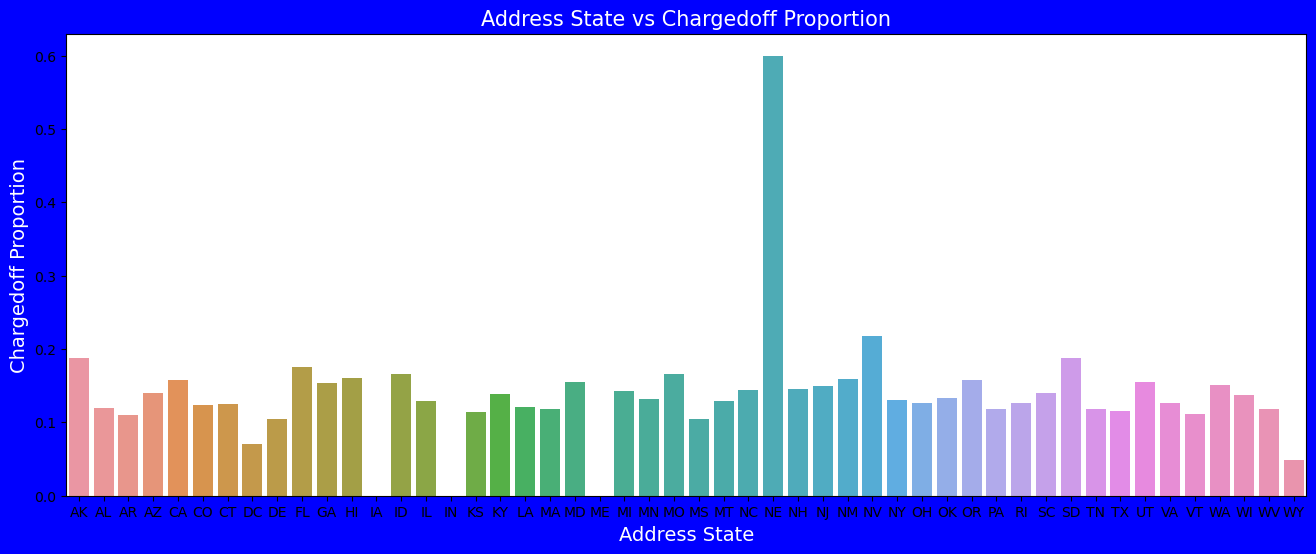

In [34]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='b')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.


In [35]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Current'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

loan_status verification_status  Charged Off  Current  Fully Paid  Total  \
2                      Verified         2051      603       10155  12809   
1               Source Verified         1434      310        8243   9987   
0                  Not Verified         2142      227       14552  16921   

loan_status  Chargedoff_Proportion  
2                         0.160122  
1                         0.143587  
0                         0.126588

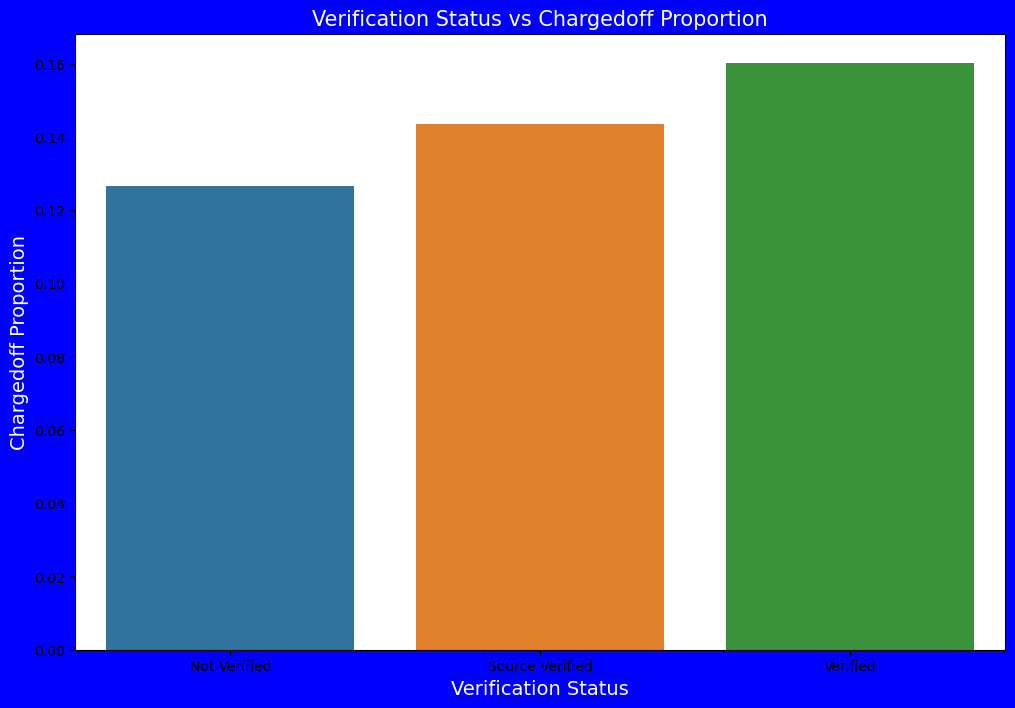

In [36]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

In [37]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

loan_status pub_rec_bankruptcies  Charged Off  Current  Fully Paid    Total  \
2                            2.0          2.0      2.0         3.0      7.0   
1                            1.0        366.0     37.0      1271.0   1674.0   
3                      not known        118.0      0.0       579.0    697.0   
0                            0.0       5141.0   1101.0     31097.0  37339.0   

loan_status  Chargedoff_Proportion  
2                         0.285714  
1                         0.218638  
3                         0.169297  
0                         0.137684

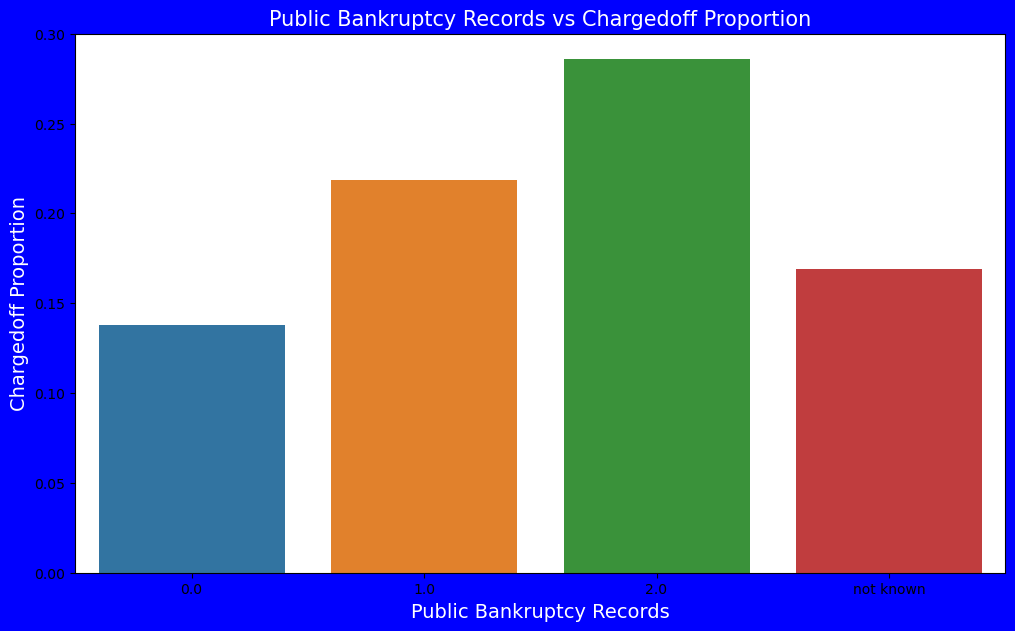

In [38]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [39]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = df.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

loan_status  pub_rec  Charged Off  Current  Fully Paid    Total  \
1                  1        457.0     43.0      1556.0   2056.0   
2                  2         10.0      3.0        38.0     51.0   
0                  0       5160.0   1094.0     31347.0  37601.0   
3                  3          0.0      0.0         7.0      7.0   
4                  4          0.0      0.0         2.0      2.0   

loan_status  Chargedoff_Proportion  
1                         0.222276  
2                         0.196078  
0                         0.137230  
3                         0.000000  
4                         0.000000

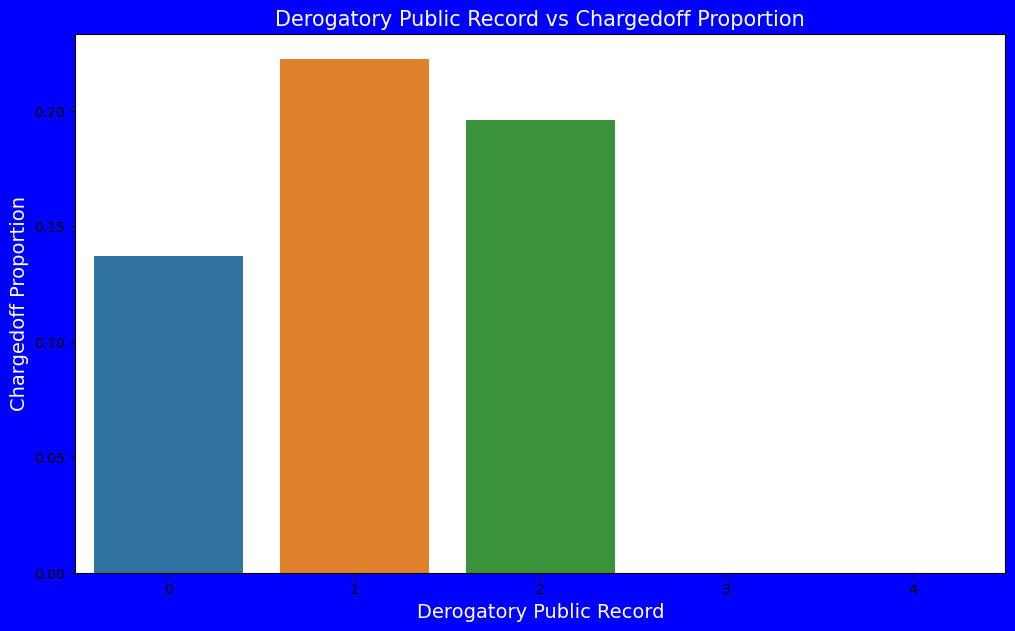

In [40]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.


Bivariate Analysis - Part 2

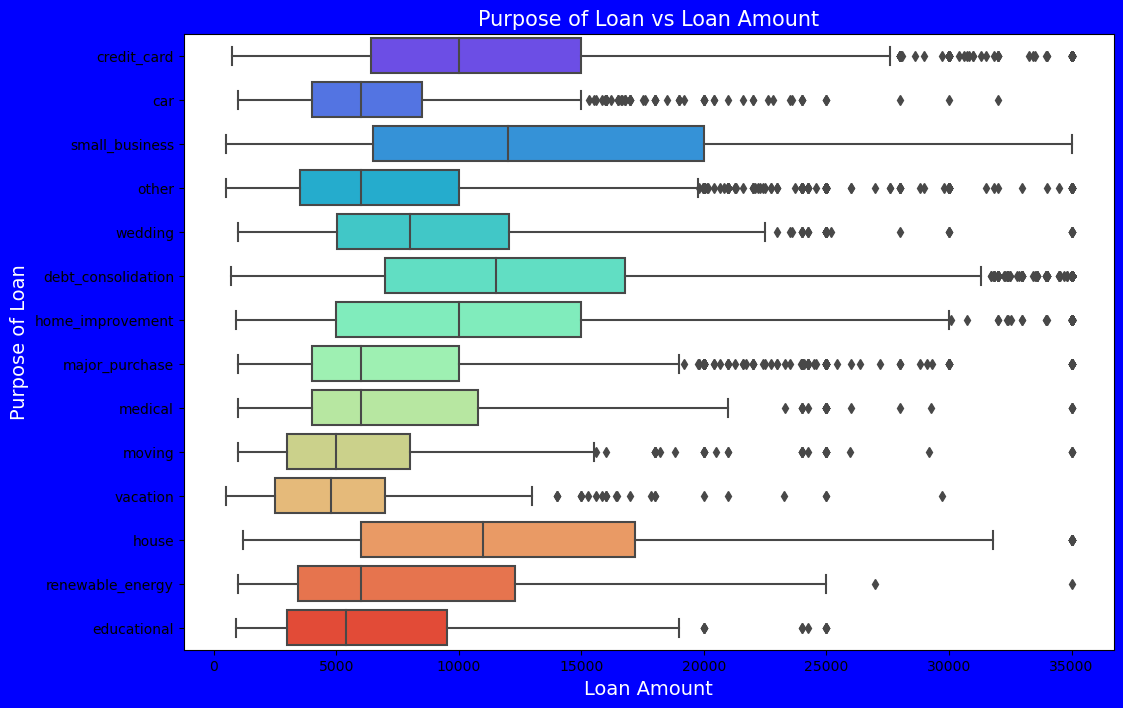

In [41]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

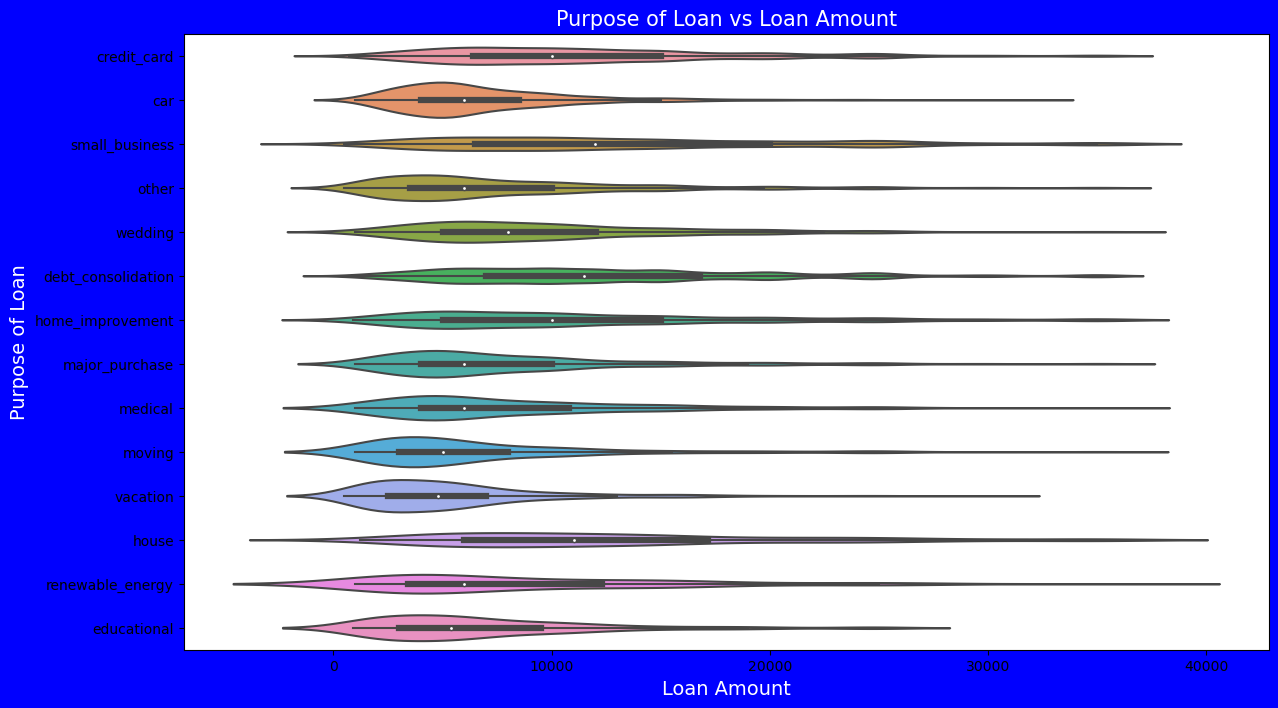

In [42]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 

plt.figure(figsize=(14,8),facecolor='b')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =df)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
# as compare to loan taken for other purposes.


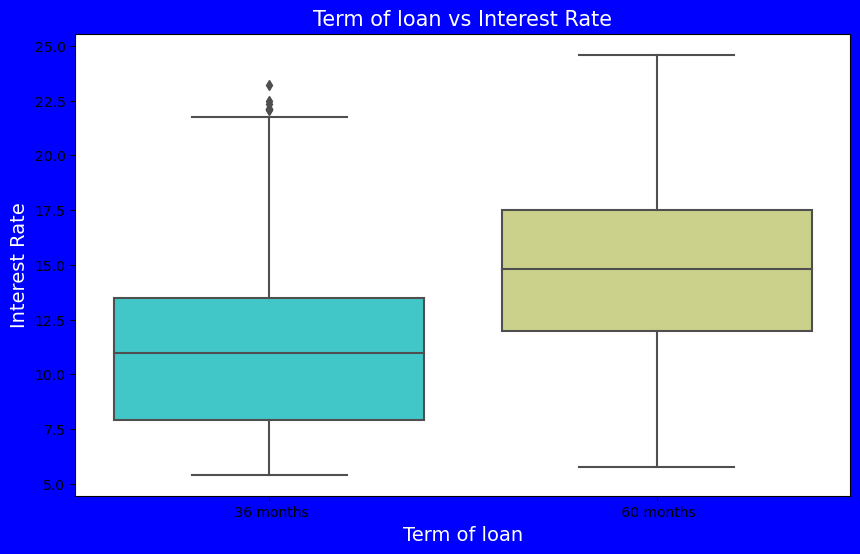

In [50]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =df,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

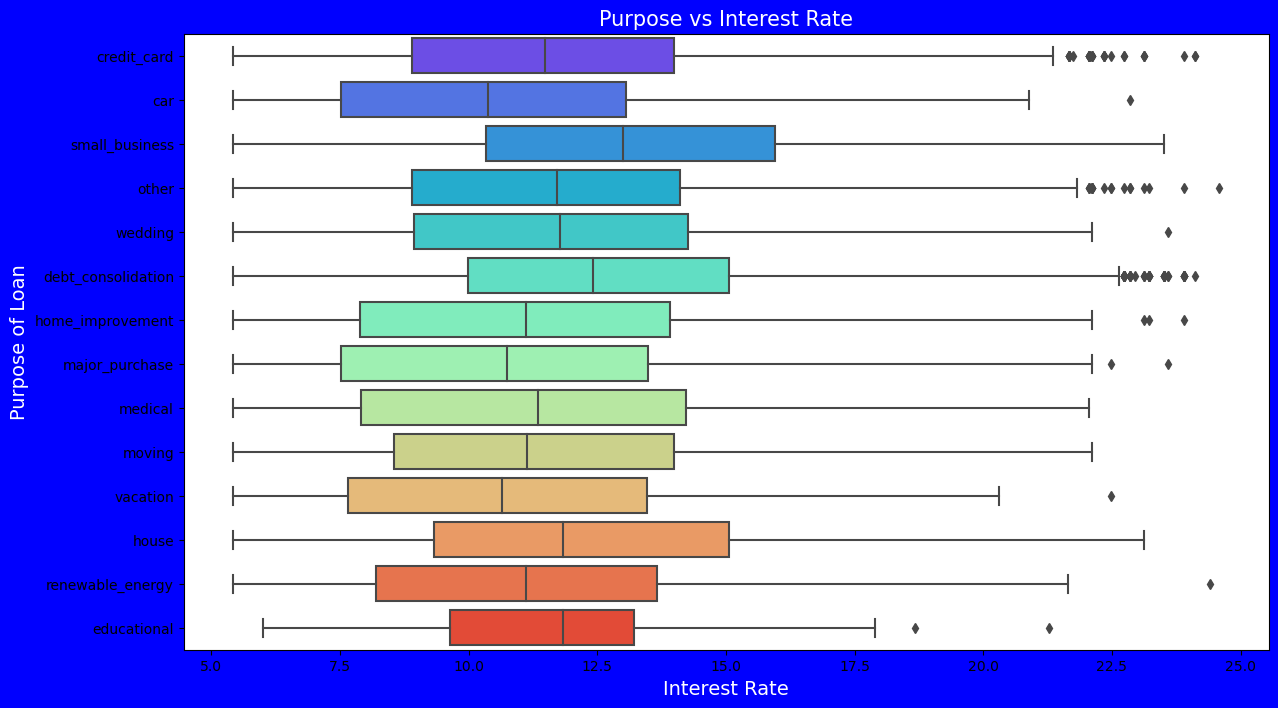

In [51]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =df,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.

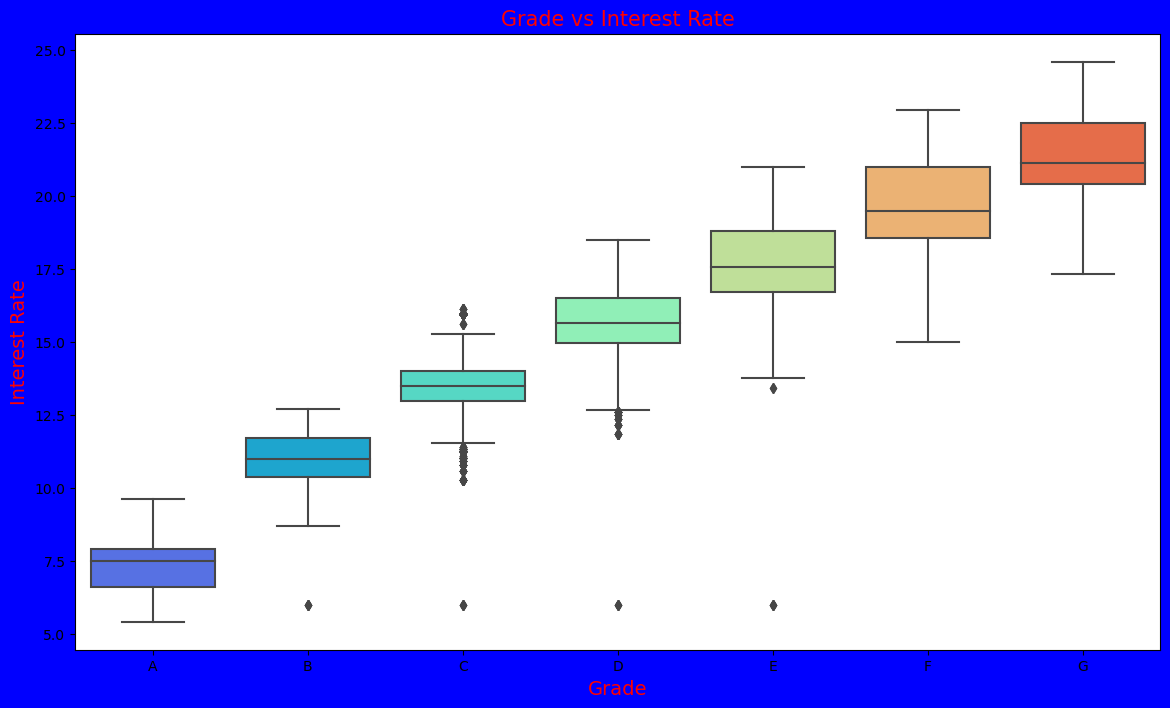

In [54]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='grade', data =df,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='r')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'r')
ax.set_xlabel('Grade',fontsize=14,color = 'r')
plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
# It is clear that intrest rate is increasing with grades moving from A to F.

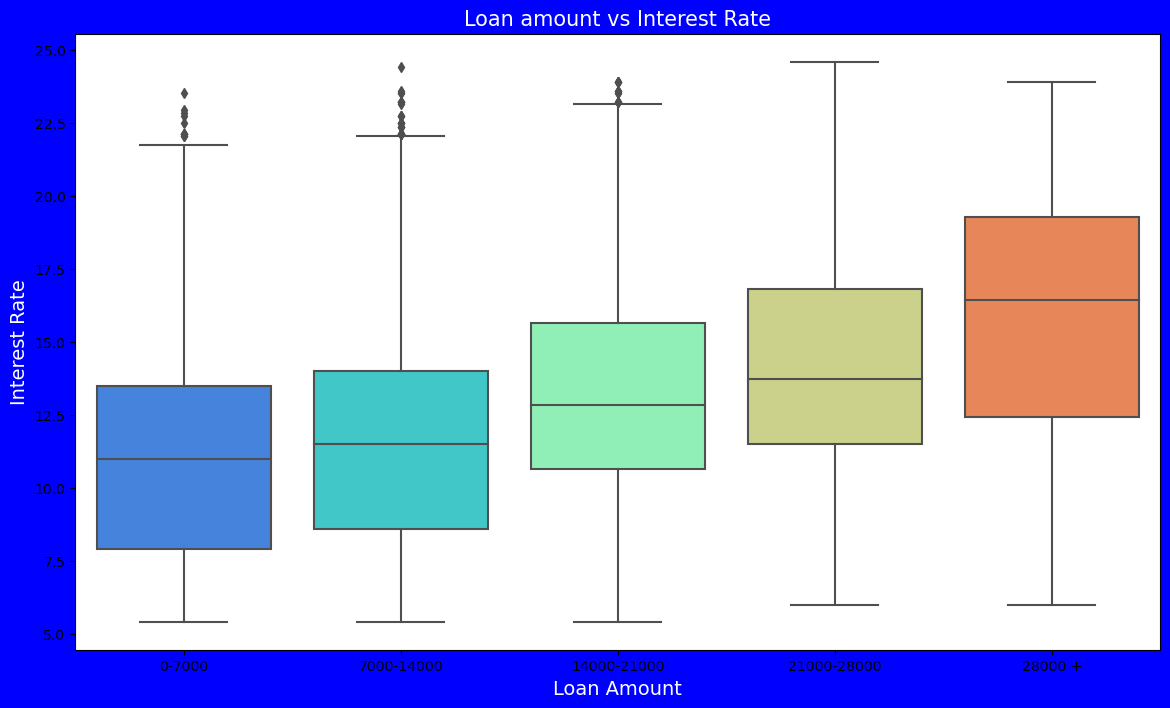

In [55]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =df,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
# interest rate.

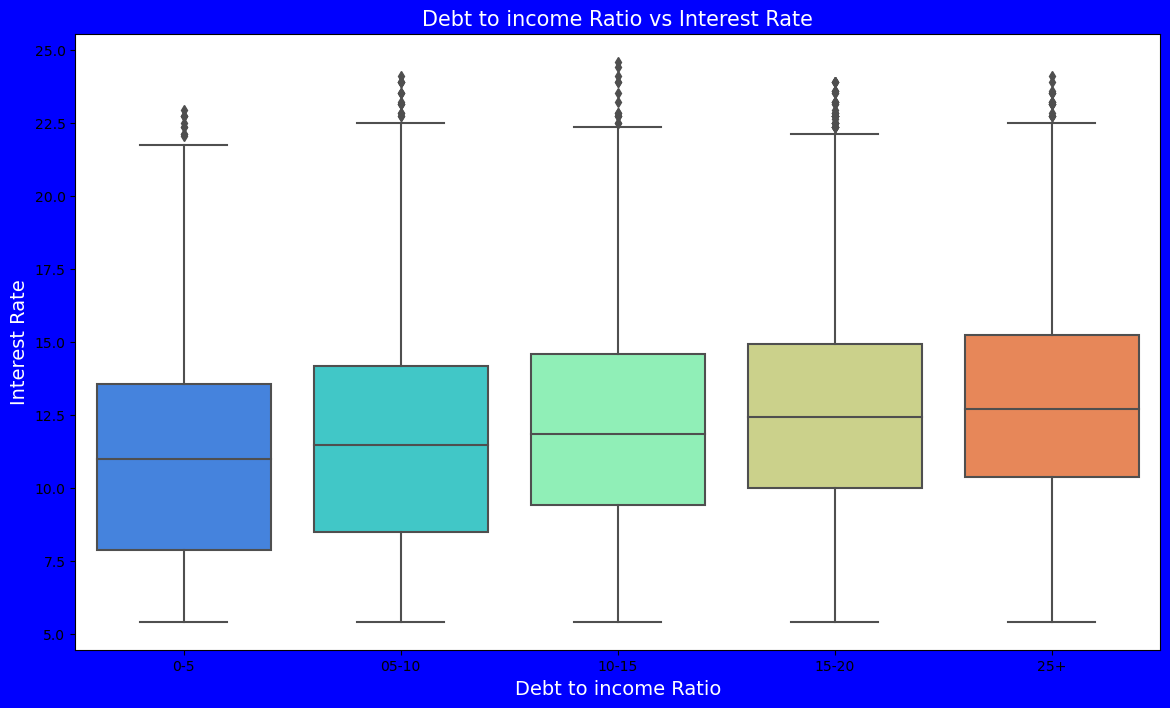

In [56]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =df,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

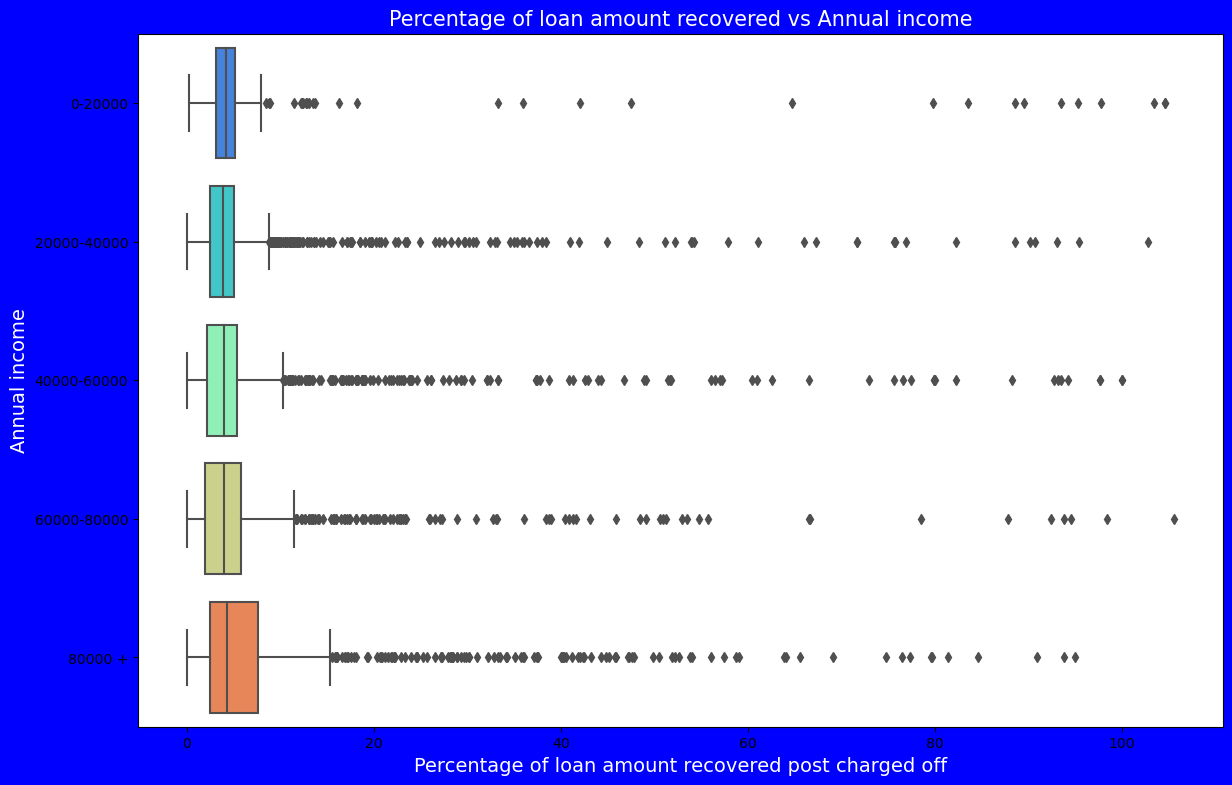

In [57]:
 #Bivariate Analysis - Recoveries vs Annual income
# Box Plot
df['recoveries']=pd.to_numeric(df['recoveries'],errors='coerce')
loan_df_rec=df[df['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9),facecolor='b')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plt.show()

# Observations:
# Higher percentage of loan amount is recovered when annual income is high.
# Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

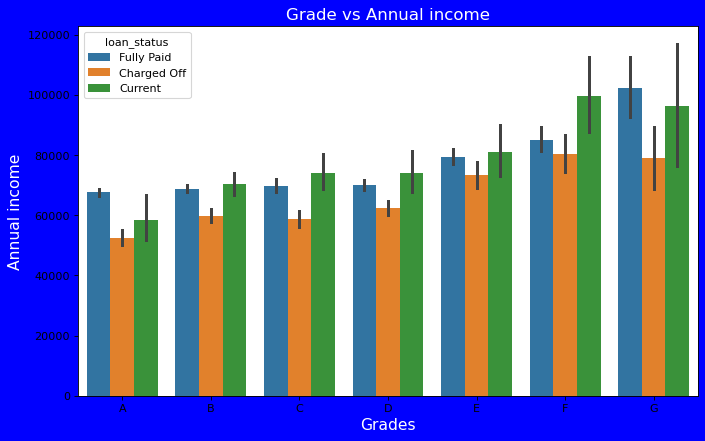

In [59]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.
import numpy as np
plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=df, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
# who'paid fully' for each and every grade (i.e. at same interest range)


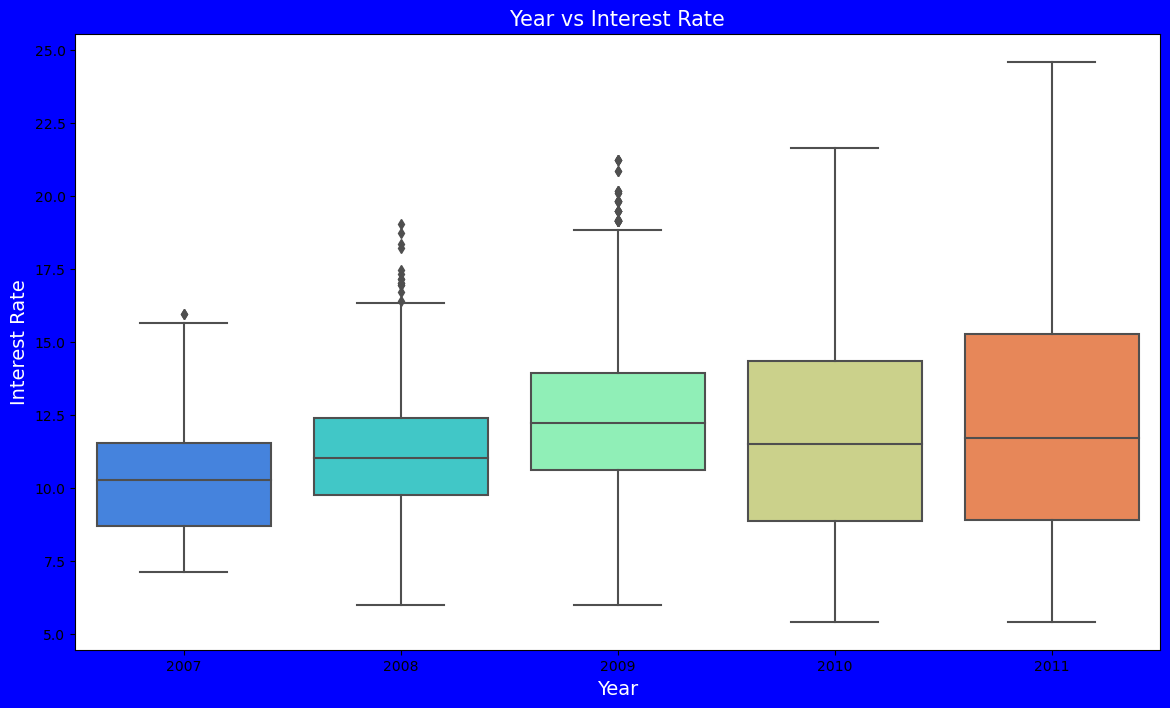

In [60]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =df,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

# Observations:
# Plot shows intrest rate is increasing slowly with increase in year.

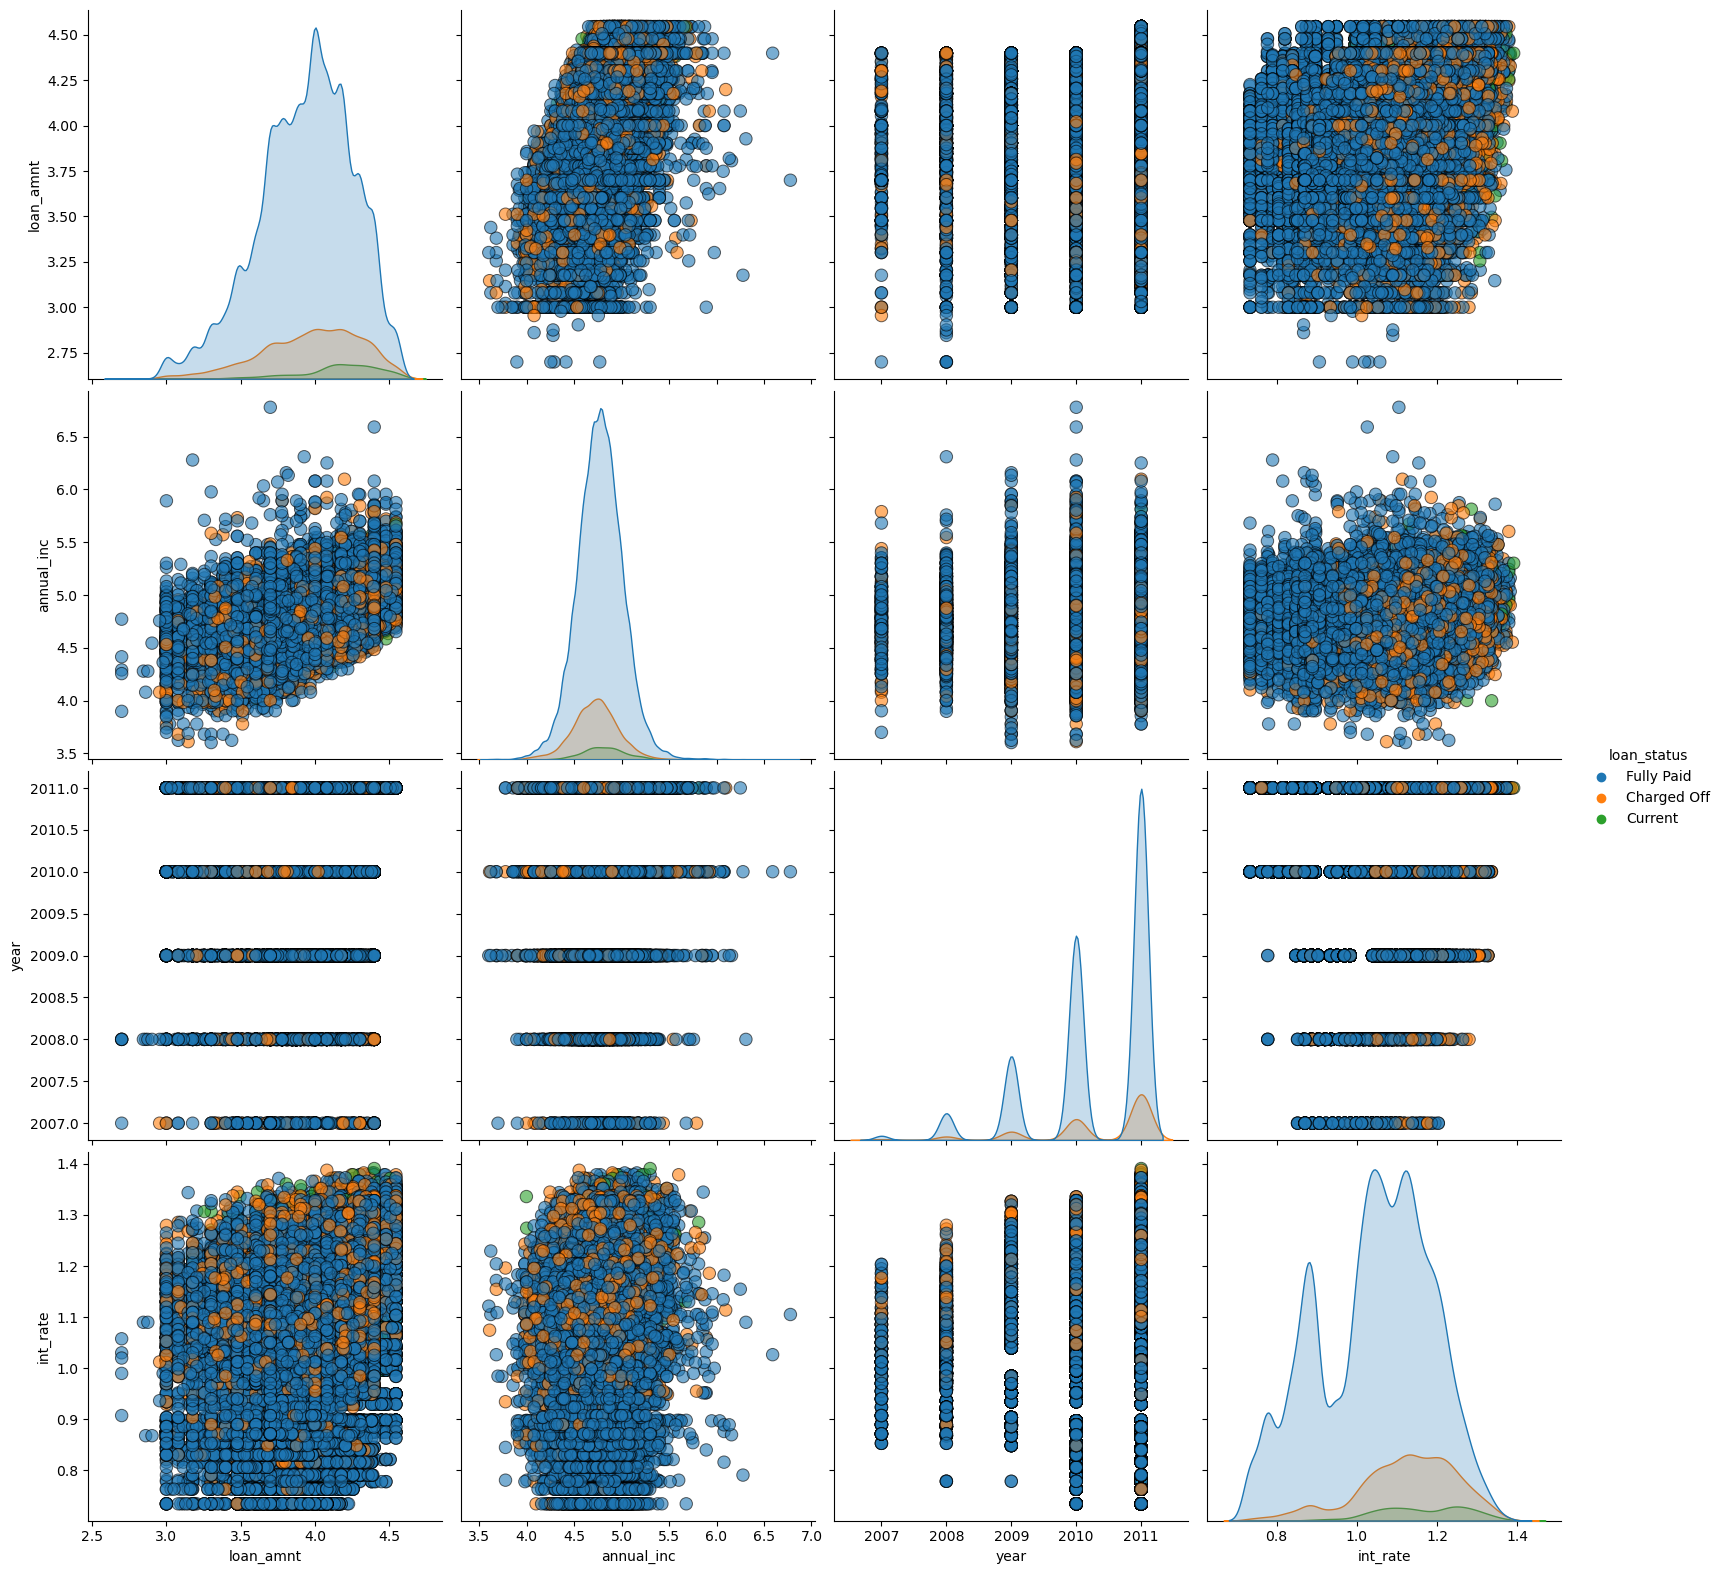

In [61]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.

loan_pair = df[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()
# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly.
# increase in number of charged off with increase in year.
# intrest rate is increasing with loan amount increase

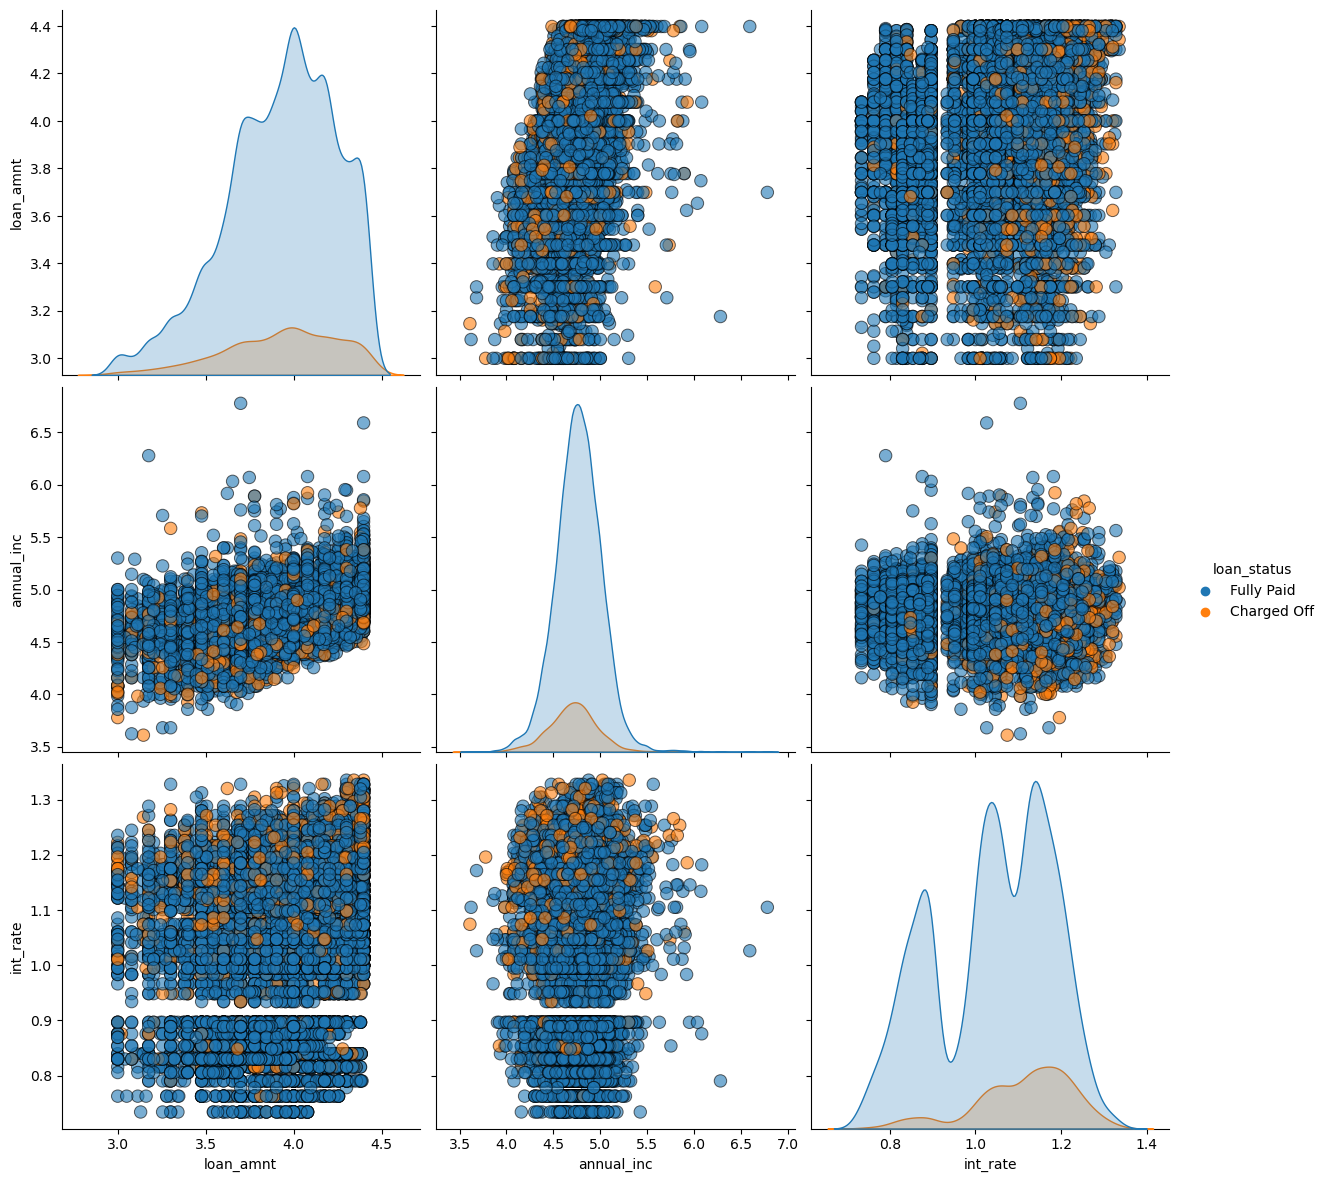

In [62]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.
# Above plot is too dense so just pick year 2010 for getting some insights.

sns.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly
# Intrest rate is increasing with loan amount increase this results in high charged off.